In [11]:
import matplotlib.pyplot as plt


def subset_sum_fptas_full(S, T, epsilon=0.01, show_graph=True):
    L = [(0, [])]  # (sum, subset)
    all_steps = []

    for x in S:
        new_sums = [(val + x, subset + [x]) for val, subset in L]
        merged = merge_and_trim_full(L + new_sums, epsilon)
        L = [item for item in merged if item[0] <= T]

        if show_graph:
            all_steps.append((x, [val for val, _ in L]))

    # All subsets with max sum
    max_sum = max(val for val, _ in L)
    valid_subsets = [subset for val, subset in L if val == max_sum]
    best_subset = min(valid_subsets, key=len)

    if show_graph:
        plot_fptas_growth(all_steps, T)

    return max_sum, valid_subsets, best_subset

In [12]:

def merge_and_trim_full(L, epsilon):
    L.sort()
    trimmed = [L[0]]
    for current in L[1:]:
        if current[0] > trimmed[-1][0] * (1 + epsilon):
            trimmed.append(current)
    return trimmed

In [ ]:
def plot_fptas_growth (all_steps, T):
    plt.figure(figsize=(10, 6))
    for i, (x, sums) in enumerate(all_steps):
        plt.plot(sums, 'o-', label=f"Step {i+1} (add {x})")
    plt.axhline(y=T, color='red', linestyle='--', label=f"Target T = {T}")
    plt.title("Subset Sum Growth Over Steps (FPTAS)")
    plt.xlabel("Index in trimmed list")
    plt.ylabel("Subset Sum Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

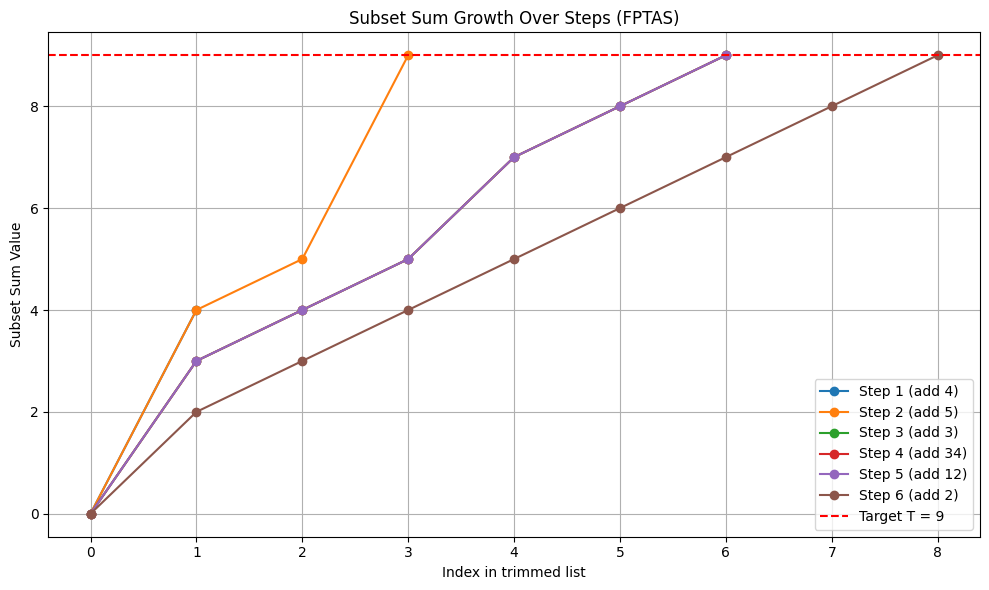

✅ Approximate Max Sum: 9
📋 All Subsets with Sum = 9
  1. [4, 3, 2]
🏆 Best Subset (shortest): [4, 3, 2]


In [14]:
S = [4, 5, 3, 34, 12, 2]
T = 9
epsilon = 0.01

max_sum, valid_subsets, best_subset = subset_sum_fptas_full(S, T, epsilon)

print("✅ Approximate Max Sum:", max_sum)
print("📋 All Subsets with Sum =", max_sum)
for i, subset in enumerate(valid_subsets, 1):
    print(f"  {i}. {subset}")
print("🏆 Best Subset (shortest):", best_subset)
